## 필요한 라이브러리 설치

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf
  !pip install category_encoders==2.*
  !pip install pandas-profiling==2.*
  !pip install plotly==4.*
  !pip install eli5
  !pip install pdpbox
  !pip install shap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (21.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and di

     |████████████████████████████████| 564 kB 5.2 MB/s 


## 투수 데이터 ( ERA 예측하기 or PO 진출 선수 예측 )

### 데이터 불러오기

In [ ]:
import pandas as pd

pitcter_1982_2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section2/1982_2021_pitcter.csv", index_col = 0)
pitcter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section2/2021_pitcher.csv", index_col = 0)
Golden_Glove = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section2/Golden_Glove.csv", index_col = 0)
KT_pitcter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section2/kt_pitcter.csv", index_col = 0)

### 데이터 설명

    - 완투 : 선발투수가 상대 팀을 상대로 모든이닝 던지는 경기
    - 완봉 : 경기가 종료될 때까지의 아웃카운트를 모두 처리한 투수
    - ERA : 평균자책점, 평균자책점 = (9 × 자책점) ÷ 투구이닝
    - FIP : 수비와 상관 없는 독립된 피칭지표
    - WHIP : 이닝당 안타+볼넷 허용률 , (피안타 + 볼넷) / 이닝
    - WAR : 대체 수준 대비 승리 기여
    

### EDA

In [ ]:
pitcter.head()

,선수,출장,완투,완봉,선발,승,패,세,홀드,이닝,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR,WPA,생일
0,미란다21두,28,1,1,28,14,5,0,0,173.2,...,1,7,2.33,2.67,1.14,185.0,161.1,7.09,3.27,1989-01-10
1,백정현21삼,27,0,0,27,14,5,0,0,157.2,...,0,5,2.63,4.21,1.24,171.9,107.3,5.28,1.78,1987-07-13
2,고영표21K,26,1,1,25,11,6,0,1,166.2,...,0,1,2.92,3.19,1.04,154.0,139.2,5.23,2.27,1991-09-16
3,켈리21L,30,0,0,30,13,8,0,0,177.0,...,1,7,3.15,3.76,1.24,136.8,115.1,4.96,1.61,1989-10-04
4,원태인21삼,26,0,0,26,14,7,0,0,158.2,...,1,5,3.06,3.65,1.25,147.4,123.4,4.76,2.41,2000-04-06


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(pitcter, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pitcter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 307
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      308 non-null    object 
 1   출장      308 non-null    int64  
 2   완투      308 non-null    int64  
 3   완봉      308 non-null    int64  
 4   선발      308 non-null    int64  
 5   승       308 non-null    int64  
 6   패       308 non-null    int64  
 7   세       308 non-null    int64  
 8   홀드      308 non-null    int64  
 9   이닝      308 non-null    float64
 10  실점      308 non-null    int64  
 11  자책      308 non-null    int64  
 12  타자      308 non-null    int64  
 13  안타      308 non-null    int64  
 14  2타      308 non-null    int64  
 15  3타      308 non-null    int64  
 16  홈런      308 non-null    int64  
 17  볼넷      308 non-null    int64  
 18  고4      308 non-null    int64  
 19  사구      308 non-null    int64  
 20  삼진      308 non-null    int64  
 21  보크      308 non-null    int64  
 22  폭투

In [ ]:
pitcter.isnull().sum()

선수        0
출장        0
완투        0
완봉        0
선발        0
승         0
패         0
세         0
홀드        0
이닝        0
실점        0
자책        0
타자        0
안타        0
2타        0
3타        0
홈런        0
볼넷        0
고4        0
사구        0
삼진        0
보크        0
폭투        0
ERA       0
FIP       0
WHIP      0
ERA+    120
FIP+      0
WAR       0
WPA       0
생일        0
dtype: int64

In [ ]:
pitcter.dtypes

선수       object
출장        int64
완투        int64
완봉        int64
선발        int64
승         int64
패         int64
세         int64
홀드        int64
이닝      float64
실점        int64
자책        int64
타자        int64
안타        int64
2타        int64
3타        int64
홈런        int64
볼넷        int64
고4        int64
사구        int64
삼진        int64
보크        int64
폭투        int64
ERA     float64
FIP     float64
WHIP    float64
ERA+    float64
FIP+    float64
WAR     float64
WPA     float64
생일       object
dtype: object

### Feature Engineering

#### 선수 이름

In [ ]:
# 이름 분리 해서, '이름' column 추가
pitcter['이름'] = pitcter['선수'].str.findall("^[ㄱ-힣]+").apply(lambda x: x[0])

# 기존 '선수' column 에 있던 이름 정보 제거
pitcter['선수'] = pitcter.apply(lambda x: x['선수'].replace(x['이름'], ''), axis=1)

#### 시즌

In [ ]:
# '시즌' column 생성
pitcter['시즌'] = pitcter['선수'].apply(lambda x: x[:2])

# 기존 '선수' column 에 있던 시즌 정보 제거
pitcter['선수'] = pitcter.apply(lambda x: x['선수'].replace(x['시즌'],''), axis=1)

# 시즌 데이터 추출
pitcter['시즌'] = pitcter['시즌'].apply(lambda x: int("20"+ x) if int(x) < 30 else int("19"+x))

#### 선수 나이

In [ ]:
pitcter['나이'] = pitcter["생일"].apply(lambda x : (2022 - int(x.split("-")[0]) if int(x.split("-")[2]) < 3 else (2021-int(x.split("-")[0]))))

In [ ]:
pitcter['팀'] = pitcter["선수"]

In [ ]:
pitcter

,선수,출장,완투,완봉,선발,승,패,세,홀드,이닝,...,WHIP,ERA+,FIP+,WAR,WPA,생일,이름,시즌,나이,팀
0,두,28,1,1,28,14,5,0,0,173.2,...,1.14,185.0,161.1,7.09,3.27,1989-01-10,미란다,2021,32,두
1,삼,27,0,0,27,14,5,0,0,157.2,...,1.24,171.9,107.3,5.28,1.78,1987-07-13,백정현,2021,34,삼
2,K,26,1,1,25,11,6,0,1,166.2,...,1.04,154.0,139.2,5.23,2.27,1991-09-16,고영표,2021,30,K
3,L,30,0,0,30,13,8,0,0,177.0,...,1.24,136.8,115.1,4.96,1.61,1989-10-04,켈리,2021,32,L
4,삼,26,0,0,26,14,7,0,0,158.2,...,1.25,147.4,123.4,4.76,2.41,2000-04-06,원태인,2021,21,삼
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,N,42,0,0,0,2,4,1,9,37.2,...,1.62,63.3,89.9,-1.07,-1.25,1985-03-07,김진성,2021,36,N
304,한,20,0,0,0,0,2,0,2,20.0,...,2.00,51.2,71.0,-1.08,-0.78,1987-05-13,신정락,2021,34,한
305,K,16,1,0,12,1,6,0,0,57.0,...,1.91,55.2,73.0,-1.13,-1.84,1993-02-09,이민우,2021,28,K
306,한,19,1,0,16,0,11,0,1,69.0,...,1.96,62.2,89.5,-1.38,-2.32,1987-11-01,장시환,2021,35,한


#### 필요 없는 특성제거

In [ ]:
pitcter.drop(["선수","생일", "WPA"], axis=1, inplace = True)
pitcter.head()

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,ERA,FIP,WHIP,ERA+,FIP+,WAR,이름,시즌,나이,팀
0,28,1,1,28,14,5,0,0,173.2,49,...,2.33,2.67,1.14,185.0,161.1,7.09,미란다,2021,32,두
1,27,0,0,27,14,5,0,0,157.2,54,...,2.63,4.21,1.24,171.9,107.3,5.28,백정현,2021,34,삼
2,26,1,1,25,11,6,0,1,166.2,59,...,2.92,3.19,1.04,154.0,139.2,5.23,고영표,2021,30,K
3,30,0,0,30,13,8,0,0,177.0,64,...,3.15,3.76,1.24,136.8,115.1,4.96,켈리,2021,32,L
4,26,0,0,26,14,7,0,0,158.2,59,...,3.06,3.65,1.25,147.4,123.4,4.76,원태인,2021,21,삼


#### 너무 작은 경기 수의 선수 데이터 제거

In [ ]:
# 20이닝 이상 출전한 선수들로만 구성
pitcter = pitcter.query("이닝 > 10").copy()
pitcter.head()

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,ERA,FIP,WHIP,ERA+,FIP+,WAR,이름,시즌,나이,팀
0,28,1,1,28,14,5,0,0,173.2,49,...,2.33,2.67,1.14,185.0,161.1,7.09,미란다,2021,32,두
1,27,0,0,27,14,5,0,0,157.2,54,...,2.63,4.21,1.24,171.9,107.3,5.28,백정현,2021,34,삼
2,26,1,1,25,11,6,0,1,166.2,59,...,2.92,3.19,1.04,154.0,139.2,5.23,고영표,2021,30,K
3,30,0,0,30,13,8,0,0,177.0,64,...,3.15,3.76,1.24,136.8,115.1,4.96,켈리,2021,32,L
4,26,0,0,26,14,7,0,0,158.2,59,...,3.06,3.65,1.25,147.4,123.4,4.76,원태인,2021,21,삼


In [ ]:
pitcter.dropna(inplace = True)

#### 1982년 ~ 2021년 데이터 불러오기

In [ ]:
pitcter_1982_2021

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,ERA,FIP,WHIP,ERA+,FIP+,WAR,이름,시즌,나이,팀
0,39,19,8,22,24,6,6,0,262.2,38,...,0.99,1.16,0.78,307.1,262.7,14.89,선동열,1986,58,해
1,60,36,5,44,30,16,6,0,427.1,138,...,2.34,2.42,1.16,143.4,138.5,13.63,장명부,1983,71,삼
2,31,9,1,12,16,5,10,0,178.1,29,...,1.21,1.26,0.85,316.2,303.8,11.79,선동열,1988,58,해
3,39,17,4,21,19,14,2,0,267.0,60,...,1.55,1.49,0.97,191.8,200.0,11.74,최동원,1986,63,롯
4,35,8,6,16,22,6,4,0,190.1,35,...,1.13,1.55,0.90,335.8,246.0,11.06,선동열,1990,58,해
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,18,0,0,5,1,3,1,0,43.1,47,...,8.52,5.86,2.19,44.7,64.9,-0.89,진동한,1989,60,삼
6496,12,0,0,1,1,1,0,0,15.2,25,...,12.06,5.70,2.55,34.3,72.5,-0.89,문동욱,2019,29,한
6497,13,0,0,1,0,2,0,0,11.0,25,...,16.36,9.79,4.55,19.9,33.3,-0.90,엄평재,1983,61,해
6498,9,0,0,7,3,2,0,0,12.1,25,...,13.86,6.66,4.46,28.6,59.5,-0.91,이상군,1991,59,빙


In [ ]:
pitcter_1982_2021.isnull().sum()

출장         0
완투         0
완봉         0
선발         0
승          0
패          0
세          0
홀드         0
이닝         0
실점         0
자책         0
타자         0
안타         0
홈런         0
볼넷         0
고4         0
사구         0
삼진         0
보크         0
폭투         0
ERA      200
FIP      200
WHIP     200
ERA+    2400
FIP+     400
WAR        0
이름         0
시즌         0
나이         0
팀          0
dtype: int64

#### 기존데이터와 merge로 합쳐주기

In [ ]:
pitcter = pd.merge(pitcter, pitcter_1982_2021, how= 'outer')
pitcter.duplicated()
pitcter

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,ERA,FIP,WHIP,ERA+,FIP+,WAR,이름,시즌,나이,팀
0,28,1,1,28,14,5,0,0,173.2,49,...,2.33,2.67,1.14,185.0,161.1,7.09,미란다,2021,32,두
1,27,0,0,27,14,5,0,0,157.2,54,...,2.63,4.21,1.24,171.9,107.3,5.28,백정현,2021,34,삼
2,26,1,1,25,11,6,0,1,166.2,59,...,2.92,3.19,1.04,154.0,139.2,5.23,고영표,2021,30,K
3,30,0,0,30,13,8,0,0,177.0,64,...,3.15,3.76,1.24,136.8,115.1,4.96,켈리,2021,32,L
4,26,0,0,26,14,7,0,0,158.2,59,...,3.06,3.65,1.25,147.4,123.4,4.76,원태인,2021,21,삼
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528,18,0,0,5,1,3,1,0,43.1,47,...,8.52,5.86,2.19,44.7,64.9,-0.89,진동한,1989,60,삼
6529,12,0,0,1,1,1,0,0,15.2,25,...,12.06,5.70,2.55,34.3,72.5,-0.89,문동욱,2019,29,한
6530,13,0,0,1,0,2,0,0,11.0,25,...,16.36,9.79,4.55,19.9,33.3,-0.90,엄평재,1983,61,해
6531,9,0,0,7,3,2,0,0,12.1,25,...,13.86,6.66,4.46,28.6,59.5,-0.91,이상군,1991,59,빙


#### 이름과 시즌을 기준으로 데이터 정렬

In [ ]:
pitcter = pitcter.sort_values(by = ["이름", "시즌"]).reset_index(drop =True)
pitcter

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,ERA,FIP,WHIP,ERA+,FIP+,WAR,이름,시즌,나이,팀
0,3,0,0,0,0,0,0,0,4.0,1,...,2.25,5.19,1.00,NaN,75.4,0.09,가내영,1991,50,태
1,20,1,0,14,7,9,0,0,107.0,69,...,5.47,4.51,1.64,79.0,95.8,0.94,가내영,1992,50,태
2,25,5,0,15,7,6,3,0,128.2,51,...,3.36,3.23,1.13,97.0,100.7,2.25,가내영,1993,50,태
3,11,0,0,0,1,0,0,0,34.0,21,...,5.03,3.87,1.53,NaN,99.2,0.47,가내영,1994,50,태
4,23,3,1,16,4,7,0,0,97.0,59,...,5.01,3.83,1.36,74.1,96.9,0.81,가내영,1995,50,태
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528,28,0,0,28,18,3,0,0,149.1,64,...,3.74,4.61,1.16,135.3,110.0,4.12,후랭코프,2018,33,두
6529,22,0,0,22,9,8,0,0,117.1,48,...,3.61,3.14,1.19,113.9,130.4,2.59,후랭코프,2019,33,두
6530,6,0,0,6,0,4,0,0,28.0,24,...,5.79,4.73,2.04,NaN,88.7,-0.05,후타도,2004,52,L
6531,19,0,0,19,3,9,0,0,101.2,62,...,5.13,4.79,1.59,103.2,111.5,1.43,휠러,2018,31,한


In [ ]:
pitcter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   출장      6533 non-null   int64  
 1   완투      6533 non-null   int64  
 2   완봉      6533 non-null   int64  
 3   선발      6533 non-null   int64  
 4   승       6533 non-null   int64  
 5   패       6533 non-null   int64  
 6   세       6533 non-null   int64  
 7   홀드      6533 non-null   int64  
 8   이닝      6533 non-null   float64
 9   실점      6533 non-null   int64  
 10  자책      6533 non-null   int64  
 11  타자      6533 non-null   int64  
 12  안타      6533 non-null   int64  
 13  2타      168 non-null    float64
 14  3타      168 non-null    float64
 15  홈런      6533 non-null   int64  
 16  볼넷      6533 non-null   int64  
 17  고4      6533 non-null   int64  
 18  사구      6533 non-null   int64  
 19  삼진      6533 non-null   int64  
 20  보크      6533 non-null   int64  
 21  폭투      6533 non-null   int64  
 22  

#### 너무 작은 경기 수의 데이터제거

In [ ]:
pitcter = pitcter.query("이닝 > 10").copy()
pitcter.drop(["ERA+","FIP+", "2타", "3타"], axis=1, inplace = True)

In [ ]:
pitcter.columns

Index(['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자',
       '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP',
       'WAR', '이름', '시즌', '나이', '팀'],
      dtype='object')

#### 역대 Golden_Glove 수상자들

In [ ]:
Golden_Glove_pitcter = Golden_Glove.copy()
Golden_Glove_pitcter["투수"] = Golden_Glove_pitcter["투수"].apply(lambda x: x.split("-")[0])
Golden_Glove_pitcter["연도"] = Golden_Glove_pitcter.연도.str.replace("년","").astype('int64')
Golden_Glove_pitcter.drop(["포수", "1루수", "2루수", "3루수", "유격수", "외야수1", "외야수2", "외야수3", "지명타자"],axis =1, inplace = True)

In [ ]:
Golden_Glove_pitcter = Golden_Glove_pitcter.T
Golden_Glove_pitcter = Golden_Glove_pitcter.rename(columns=Golden_Glove_pitcter.iloc[0]).drop(Golden_Glove_pitcter.index[0])
Golden_Glove_pitcter

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
투수,미란다,알칸타라,린드블럼,린드블럼,양현종,니퍼트,해커,밴헤켄,손승락,장원삼,...,선동열,선동열,선동열,선동열,김시진,선동열,김시진,최동원,장명부,황태환


In [ ]:
Golden_Glove_pitcter_list = []
for col in Golden_Glove_pitcter.columns:
  Golden_Glove_pitcter_list = list(Golden_Glove_pitcter[col])
  pitcter.loc[(pitcter["시즌"] == col) & (pitcter["이름"].isin(Golden_Glove_pitcter_list)), "Golden_Glove"] = 1

In [ ]:
pitcter['Golden_Glove'] = pitcter.Golden_Glove.fillna(0).astype('int64')

#### 팀 이름을 풀 네임으로 변경

In [ ]:
KT_pitcter['이름'] = KT_pitcter['선수'].str.findall("^[ㄱ-힣]+").apply(lambda x: x[0])
KT_pitcter_list = list(set(KT_pitcter["이름"]))

In [ ]:
pitcter["팀"] = pitcter["팀"].apply(lambda x: x[-1])

In [ ]:
pitcter.팀.unique()

array(['태', '현', '쌍', 'S', '해', 'K', '롯', '삼', 'O', '두', 'N', '빙', 'L',
       '한', '히', '넥', 'k', '청', 'M', '키'], dtype=object)

##### K 는 KIA타이거즈와 KT위즈 두개가 겹침

In [ ]:
pitcter[pitcter["팀"] == "K"]

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,폭투,ERA,FIP,WHIP,WAR,이름,시즌,나이,팀,Golden_Glove
11,13,0,0,3,1,0,0,1,25.0,11,...,1,2.52,3.80,1.60,0.57,가내영,2002,50,K,0
13,28,0,0,28,11,8,0,0,159.2,86,...,13,4.34,3.73,1.42,2.84,가뇽,2020,31,K,0
165,26,0,0,16,5,6,0,1,77.2,51,...,6,5.68,4.25,1.57,0.86,강철민,2002,42,K,0
166,27,2,0,19,6,7,0,1,90.1,54,...,2,4.88,5.85,1.40,0.45,강철민,2003,42,K,0
167,31,1,0,26,8,12,1,0,145.1,94,...,9,5.33,4.52,1.51,1.60,강철민,2004,42,K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,49,0,0,0,4,1,0,12,36.0,19,...,3,4.75,5.33,1.44,0.51,홍상삼,2021,31,K,0
6443,48,0,0,0,0,0,1,3,56.0,22,...,2,3.38,4.68,1.54,0.87,홍성민,2012,32,K,0
6461,56,0,0,0,2,1,1,6,45.0,28,...,2,5.40,5.39,1.44,0.68,홍성용,2018,35,K,0
6511,37,0,0,2,3,1,0,1,52.2,31,...,0,4.96,5.75,1.33,0.77,황인준,2018,30,K,0


In [ ]:
# 팀명 변경
pitcter.loc[pitcter["팀"].isin(["롯"]), "팀"] = "롯데자이언츠"
pitcter.loc[pitcter["팀"].isin(["한", "빙"]), "팀"] = "한화이글스"
pitcter.loc[pitcter["팀"].isin(["삼"]), "팀"] = "삼성라이온즈"
pitcter.loc[pitcter["팀"].isin(["두", "O"]), "팀"] = "두산베어스"
pitcter.loc[pitcter["팀"].isin(["N"]), "팀"] = "NC다이노스"
pitcter.loc[pitcter["팀"].isin(["키", "히", "넥"]), "팀"] = "키움히어로즈"
pitcter.loc[pitcter["팀"].isin(["현", "태", "청"]), "팀"] = "현대유니콘스"
pitcter.loc[pitcter["팀"].isin(["M","L"]), "팀"] = "LG트윈스"
pitcter.loc[pitcter["팀"].isin(["해"]), "팀"] = "KIA타이거즈"
pitcter.loc[pitcter["팀"].isin(["쌍"]), "팀"] = "쌍방울레이더스"
pitcter.loc[pitcter["팀"].isin(["K","k"]), "팀"] = "KIA타이거즈"
pitcter.loc[(pitcter["팀"] == "KIA타이거즈") & (pitcter["이름"].isin(KT_pitcter_list)), "팀"] = "KT위즈"
pitcter.loc[pitcter["팀"].isin(["S"]), "팀"] = "SSG랜더스"

In [ ]:
# 소속팀 시즌 플레이오프 출전 여부 특성
pitcter.loc[(pitcter["팀"] == "KIA타이거즈") & (pitcter["시즌"].isin([1983, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1996, 1997, 2002, 2003, 2004, 
                                                                   2006, 2009, 2011, 2016, 2017, 2018])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "삼성라이온즈") & (pitcter["시즌"].isin([1982, 1984, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1997, 1998, 1999, 2000, 2001, 
                                                                    2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2021])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "두산베어스") & (pitcter["시즌"].isin([1982, 1986, 1987, 1993, 1995, 1998, 1999, 2000, 2001, 2004, 2005, 2007, 2008, 2009, 2010,
                                                                  2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "현대유니콘스") & (pitcter["시즌"].isin([1989, 1994, 1996, 1998, 2000, 2001, 2002, 2003, 2004, 2006])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "SSG랜더스") & (pitcter["시즌"].isin([2003, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2015, 2017, 2018, 2019])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "LG트윈스") & (pitcter["시즌"].isin([1983, 1990, 1993, 1994, 1995, 1997, 1998, 2000, 2002, 2013, 2014, 2016, 2019, 2020, 2021])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "롯데자이언즈") & (pitcter["시즌"].isin([1984, 1991, 1992, 1995, 1999, 2000, 2008, 2009, 2010, 2011, 2012, 2017])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "한화이글스") & (pitcter["시즌"].isin([1988, 1989, 1990, 1991, 1992, 1994, 1996, 1999, 2001, 2005, 2006, 2007, 2018])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "키움히어로즈") & (pitcter["시즌"].isin([2013, 2014, 2015, 2016, 2018, 2019, 2020, 2021])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "NC다이노스") & (pitcter["시즌"].isin([2014, 2015, 2016, 2017, 2019, 2020])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "쌍방울레이더스") & (pitcter["시즌"].isin([1996, 1997])), "PO"] = 1
pitcter.loc[(pitcter["팀"] == "KT위즈") & (pitcter["시즌"].isin([2020, 2021])), "PO"] = 1
pitcter["PO"] = pitcter["PO"].fillna(0).astype('int64')

#### 홈 야구장 중앙 펜스 거리


In [ ]:
pitcter.loc[(pitcter["시즌"] >= 2008) & (pitcter["시즌"] <= 2015) & (pitcter["팀"] == "키움히어로즈"), "중앙펜스"] = 118
pitcter.loc[(pitcter["시즌"] >= 2016) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "키움히어로즈"), "중앙펜스"] = 125
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 2013) & (pitcter["팀"] == "KIA타이거즈"), "중앙펜스"] = 120
pitcter.loc[(pitcter["시즌"] >= 2014) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "KIA타이거즈"), "중앙펜스"] = 121
pitcter.loc[(pitcter["시즌"] >= 1990) & (pitcter["시즌"] <= 1999) & (pitcter["팀"] == "쌍방울레이더스"), "중앙펜스"] = 110
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 2015) & (pitcter["팀"] == "삼성라이온즈"), "중앙펜스"] = 120
pitcter.loc[(pitcter["시즌"] >= 2016) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "삼성라이온즈"), "중앙펜스"] = 122
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 2002) & (pitcter["팀"] == "한화이글스"), "중앙펜스"] = 115
pitcter.loc[(pitcter["시즌"] >= 2003) & (pitcter["시즌"] <= 2012) & (pitcter["팀"] == "한화이글스"), "중앙펜스"] = 114
pitcter.loc[(pitcter["시즌"] >= 2013) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "한화이글스"), "중앙펜스"] = 122
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "LG트윈스"), "중앙펜스"] = 125
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 1984) & (pitcter["팀"] == "두산베어스"), "중앙펜스"] = 115
pitcter.loc[(pitcter["시즌"] >= 1985) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "두산베어스"), "중앙펜스"] = 125
pitcter.loc[(pitcter["시즌"] >= 2012) & (pitcter["시즌"] <= 2018) & (pitcter["팀"] == "NC다이노스"), "중앙펜스"] = 116
pitcter.loc[(pitcter["시즌"] >= 2019) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "NC다이노스"), "중앙펜스"] = 121
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 1985) & (pitcter["팀"] == "롯데자이언츠"), "중앙펜스"] = 110
pitcter.loc[(pitcter["시즌"] >= 1986) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "롯데자이언츠"), "중앙펜스"] = 118
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 1988) & (pitcter["팀"] == "현대유니콘스"), "중앙펜스"] = 110
pitcter.loc[(pitcter["시즌"] >= 1989) & (pitcter["시즌"] <= 2007) & (pitcter["팀"] == "현대유니콘스"), "중앙펜스"] = 120
pitcter.loc[(pitcter["시즌"] >= 2015) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "KT위즈"), "중앙펜스"] = 120
pitcter.loc[(pitcter["시즌"] >= 2000) & (pitcter["시즌"] <= 2001) & (pitcter["팀"] == "SSG랜더스"), "중앙펜스"] = 110
pitcter.loc[(pitcter["시즌"] >= 2002) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "SSG랜더스"), "중앙펜스"] = 120

#### 홈 야구장 펜스 높이

In [ ]:
pitcter.loc[(pitcter["시즌"] >= 2008) & (pitcter["시즌"] <= 2015) & (pitcter["팀"] == "키움히어로즈"), "펜스높이"] = 2
pitcter.loc[(pitcter["시즌"] >= 2016) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "키움히어로즈"), "펜스높이"] = 3
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 2013) & (pitcter["팀"] == "KIA타이거즈"), "펜스높이"] = 3
pitcter.loc[(pitcter["시즌"] >= 2014) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "KIA타이거즈"), "펜스높이"] = 3
pitcter.loc[(pitcter["시즌"] >= 1990) & (pitcter["시즌"] <= 1995) & (pitcter["팀"] == "쌍방울레이더스"), "펜스높이"] = 2.1
pitcter.loc[(pitcter["시즌"] >= 1996) & (pitcter["시즌"] <= 1999) & (pitcter["팀"] == "쌍방울레이더스"), "펜스높이"] = 5.8
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 2015) & (pitcter["팀"] == "삼성라이온즈"), "펜스높이"] = 3
pitcter.loc[(pitcter["시즌"] >= 2016) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "삼성라이온즈"), "펜스높이"] = 3
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 2012) & (pitcter["팀"] == "한화이글스"), "펜스높이"] = 2.5
pitcter.loc[(pitcter["시즌"] >= 2013) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "한화이글스"), "펜스높이"] = 4
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "LG트윈스"), "펜스높이"] = 2.6
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 1984) & (pitcter["팀"] == "두산베어스"), "펜스높이"] = 2.5
pitcter.loc[(pitcter["시즌"] >= 1985) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "두산베어스"), "펜스높이"] = 2.6
pitcter.loc[(pitcter["시즌"] >= 2012) & (pitcter["시즌"] <= 2018) & (pitcter["팀"] == "NC다이노스"), "펜스높이"] = 3.8
pitcter.loc[(pitcter["시즌"] >= 2019) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "NC다이노스"), "펜스높이"] = 3
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 1985) & (pitcter["팀"] == "롯데자이언츠"), "펜스높이"] = 2.2
pitcter.loc[(pitcter["시즌"] >= 1986) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "롯데자이언츠"), "펜스높이"] = 6
pitcter.loc[(pitcter["시즌"] >= 1982) & (pitcter["시즌"] <= 1988) & (pitcter["팀"] == "현대유니콘스"), "펜스높이"] = 4.8
pitcter.loc[(pitcter["시즌"] >= 1989) & (pitcter["시즌"] <= 2007) & (pitcter["팀"] == "현대유니콘스"), "펜스높이"] = 4
pitcter.loc[(pitcter["시즌"] >= 2015) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "KT위즈"), "펜스높이"] = 4
pitcter.loc[(pitcter["시즌"] >= 2000) & (pitcter["시즌"] <= 2001) & (pitcter["팀"] == "SSG랜더스"), "펜스높이"] = 4.8
pitcter.loc[(pitcter["시즌"] >= 2002) & (pitcter["시즌"] <= 2021) & (pitcter["팀"] == "SSG랜더스"), "펜스높이"] = 2.8

#### 중앙펜스 120M를 기준으로 타자친화 투수친화로 나눔

    - 투수친화 : 중앙펜스 거리가 멀기때문에 상대적으로 투수에게 유리한 구장 (0)
    - 타자친화 : 중앙펜스 거리가 짧기때문에 상대적으로 타자에게 유리한 구장 (1)
    - 타자들의 지표에서 투수친화가 홈구장임에도 불구하고 높으면 지표가 매우 좋다고 생각함

In [ ]:
pitcter.loc[pitcter["중앙펜스"] >= 120, "타자친화"] = 0
pitcter.loc[pitcter["중앙펜스"] < 120, "타자친화"] = 1

#### 시즌을 기준으로 타율, 출루, 장타, OPS, wOBA 평균 테이블

In [ ]:
pitcter_mean = pitcter.groupby("시즌")['ERA', 'FIP', 'WHIP', 'WAR'].mean().round(3).reset_index()
pitcter_mean = pitcter_mean.set_index('시즌')
pitcter_mean = pitcter_mean.T
pitcter_mean

시즌,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ERA,4.100,4.047,3.733,3.860,3.665,4.142,4.221,4.364,4.453,4.791,...,4.110,4.628,5.497,5.254,5.383,5.390,5.354,4.474,5.165,4.745
FIP,4.035,3.814,3.573,3.629,3.425,3.873,4.100,3.952,4.234,4.351,...,3.962,4.468,5.505,5.089,5.299,5.244,5.307,4.415,5.141,4.730
WHIP,1.437,1.430,1.368,1.381,1.358,1.442,1.414,1.469,1.488,1.502,...,1.392,1.498,1.618,1.573,1.608,1.558,1.527,1.457,1.545,1.537
WAR,2.305,1.847,1.907,2.001,1.740,1.660,1.635,1.562,1.373,1.611,...,1.263,1.232,1.211,0.973,0.941,0.999,0.990,1.015,0.890,0.755


In [ ]:
for col in pitcter_mean.columns:
  pitcter.loc[(pitcter["시즌"] == col) & (pitcter["ERA"] >= pitcter_mean[col].iloc[0]) & (pitcter["FIP"] >= pitcter_mean[col].iloc[1]) & (pitcter["WHIP"] >= pitcter_mean[col].iloc[2]) & (pitcter["WAR"] >= pitcter_mean[col].iloc[3]), "평균이상투수"] = 1
pitcter["평균이상투수"].fillna(0, inplace = True)
pitcter.head()

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,이름,시즌,나이,팀,Golden_Glove,PO,중앙펜스,펜스높이,타자친화,평균이상투수
1,20,1,0,14,7,9,0,0,107.0,69,...,가내영,1992,50,현대유니콘스,0,0,120.0,4.0,0.0,0.0
2,25,5,0,15,7,6,3,0,128.2,51,...,가내영,1993,50,현대유니콘스,0,0,120.0,4.0,0.0,0.0
3,11,0,0,0,1,0,0,0,34.0,21,...,가내영,1994,50,현대유니콘스,0,1,120.0,4.0,0.0,0.0
4,23,3,1,16,4,7,0,0,97.0,59,...,가내영,1995,50,현대유니콘스,0,0,120.0,4.0,0.0,0.0
5,44,0,0,16,8,6,6,0,133.1,59,...,가내영,1996,50,현대유니콘스,0,1,120.0,4.0,0.0,0.0


#### 결측치를 위에 값으로 대체하고 데이터타입 변경

In [ ]:
pitcter.fillna(method='ffill', inplace = True)
pitcter["나이"] = pitcter.나이.astype('int64')
pitcter["Golden_Glove"] = pitcter.Golden_Glove.astype('int64')
pitcter["PO"] = pitcter.PO.astype('int64')
pitcter["타자친화"] = pitcter.타자친화.astype('int64')
pitcter["평균이상투수"] = pitcter.평균이상투수.astype('int64')
pitcter["중앙펜스"] = pitcter.중앙펜스.astype('int64')
pitcter

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,이름,시즌,나이,팀,Golden_Glove,PO,중앙펜스,펜스높이,타자친화,평균이상투수
1,20,1,0,14,7,9,0,0,107.0,69,...,가내영,1992,50,현대유니콘스,0,0,120,4.0,0,0
2,25,5,0,15,7,6,3,0,128.2,51,...,가내영,1993,50,현대유니콘스,0,0,120,4.0,0,0
3,11,0,0,0,1,0,0,0,34.0,21,...,가내영,1994,50,현대유니콘스,0,1,120,4.0,0,0
4,23,3,1,16,4,7,0,0,97.0,59,...,가내영,1995,50,현대유니콘스,0,0,120,4.0,0,0
5,44,0,0,16,8,6,6,0,133.1,59,...,가내영,1996,50,현대유니콘스,0,1,120,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528,28,0,0,28,18,3,0,0,149.1,64,...,후랭코프,2018,33,두산베어스,0,1,125,2.6,0,0
6529,22,0,0,22,9,8,0,0,117.1,48,...,후랭코프,2019,33,두산베어스,0,1,125,2.6,0,0
6530,6,0,0,6,0,4,0,0,28.0,24,...,후타도,2004,52,LG트윈스,0,0,125,2.6,0,0
6531,19,0,0,19,3,9,0,0,101.2,62,...,휠러,2018,31,한화이글스,0,1,122,4.0,0,0


In [ ]:
pitcter.columns

Index(['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자',
       '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP',
       'WAR', '이름', '시즌', '나이', '팀', 'Golden_Glove', 'PO', '중앙펜스', '펜스높이',
       '타자친화', '평균이상투수'],
      dtype='object')

#### 특성들의 이름을 좀 더 알아보기 편하게 변경

    - 규정이닝 : 144경기에서 1.0배를 곱한 144이닝

In [ ]:
pitcter.loc[pitcter["이닝"] >= 144, "규정이닝"] = 1
pitcter.loc[pitcter["이닝"] < 144, "규정이닝"] = 0
pitcter["규정이닝"] = pitcter.규정이닝.astype('int64')

### 투수 데이터 분류문제 ( PO출전 선수 예측 문제 )

#### 데이터 훈련/검증/테스트 셋으로 분리

    - 훈련 : 테스트 이외의 80% 데이터
    - 검증 : 테스트 이외의 20% 데이터
    - 테스트 : 2021년 선수 데이터

In [ ]:
from sklearn.model_selection import train_test_split
pitcter_train, pitcter_test  = train_test_split(pitcter, train_size=0.8, random_state=42)
pitcter_train, pitcter_val = train_test_split(pitcter_train, train_size=0.8, random_state=42)
pitcter_train.shape, pitcter_val.shape , pitcter_test.shape

((3156, 35), (790, 35), (987, 35))

#### Target 지정

In [ ]:
pitcter_train['PO'].value_counts(normalize=True)

0    0.563054
1    0.436946
Name: PO, dtype: float64

In [ ]:
target = 'PO'
features = pitcter_train.drop(columns=[target,"시즌","이름"]).columns

X_pitcter_train = pitcter_train[features]
y_pitcter_train = pitcter_train[target]
X_pitcter_val = pitcter_val[features]
y_pitcter_val = pitcter_val[target]
X_pitcter_test = pitcter_test[features]
y_pitcter_test = pitcter_test[target]

#### RandomForest 모델 하이퍼 파라미터 조정 전

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

pipe.fit(X_pitcter_train, y_pitcter_train)
print('검증 정확도', pipe.score(X_pitcter_val, y_pitcter_val))

검증 정확도 0.7037974683544304


#### 특성 중요도 확인

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,20))
plt.rc('font', family='NanumBarunGothic')
plt.rc('figure', figsize=(15, 15))

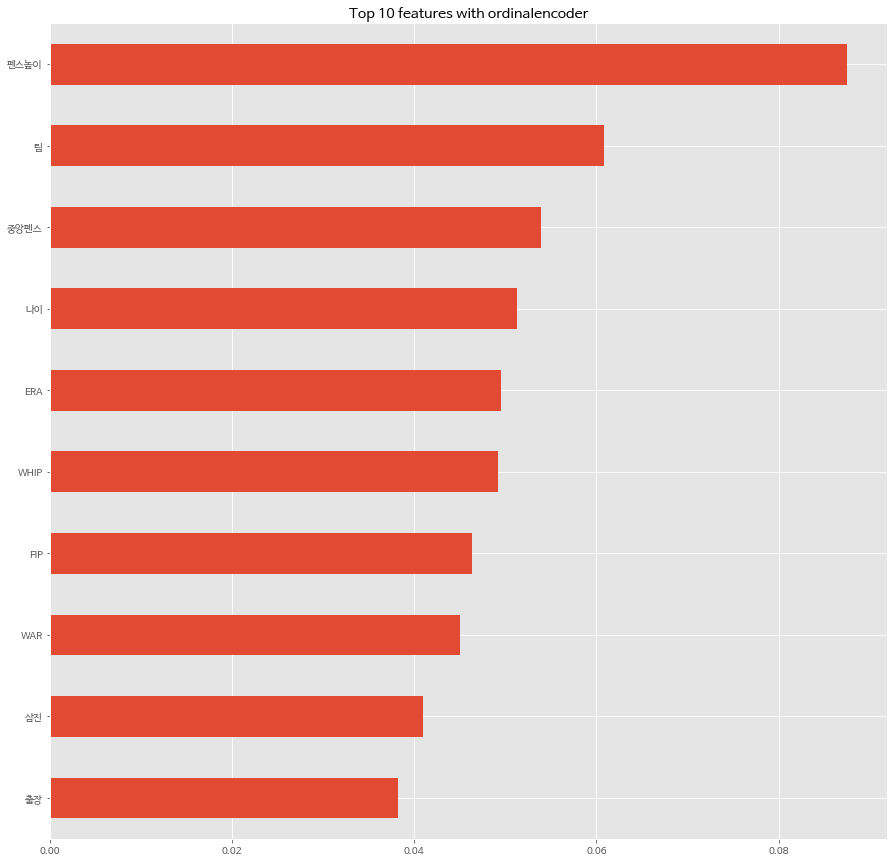

In [ ]:
rf_ord = pipe.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf_ord.feature_importances_, X_pitcter_train.columns)

plt.title(f'Top 10 features with ordinalencoder')
importances_ord.sort_values()[-10:].plot.barh();

##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred = pipe.predict(X_pitcter_val)
f1_score(y_pitcter_val, y_pred)

0.6558823529411765

##### Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix, n = 790')

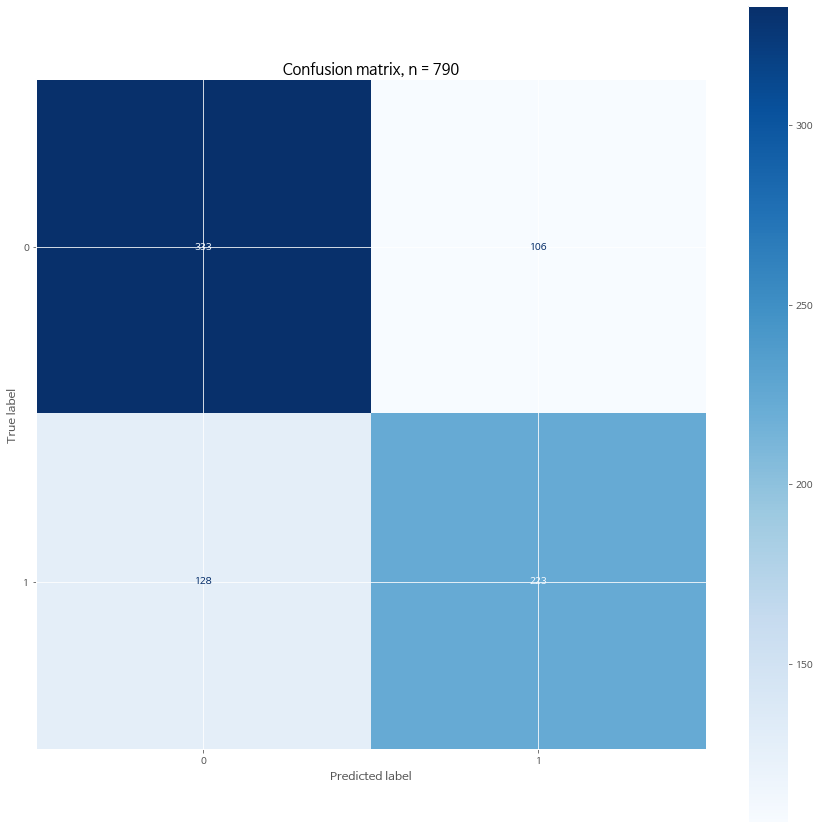

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_pitcter_val, y_pitcter_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_pitcter_val)}', fontsize=15)

#### RandomForest 하이퍼 파라미터 조정 1

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

dists = {       
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': [100, 500, 1000], 
    'randomforestclassifier__max_depth': [100, 500, 1000],
    'randomforestclassifier__max_features': ['auto','log2'], 
    'randomforestclassifier__class_weight': ['balanced', None]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
최적 하이퍼파라미터:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 500, 'simpleimputer__strategy': 'mean'}
최적 스코어:  0.6950568890736448


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       439
           1       0.69      0.71      0.70       351

    accuracy                           0.73       790
   macro avg       0.73      0.73      0.73       790
weighted avg       0.73      0.73      0.73       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.7014084507042254


##### AUC Score, Roc Curve

AUC score:  0.8062872755355671


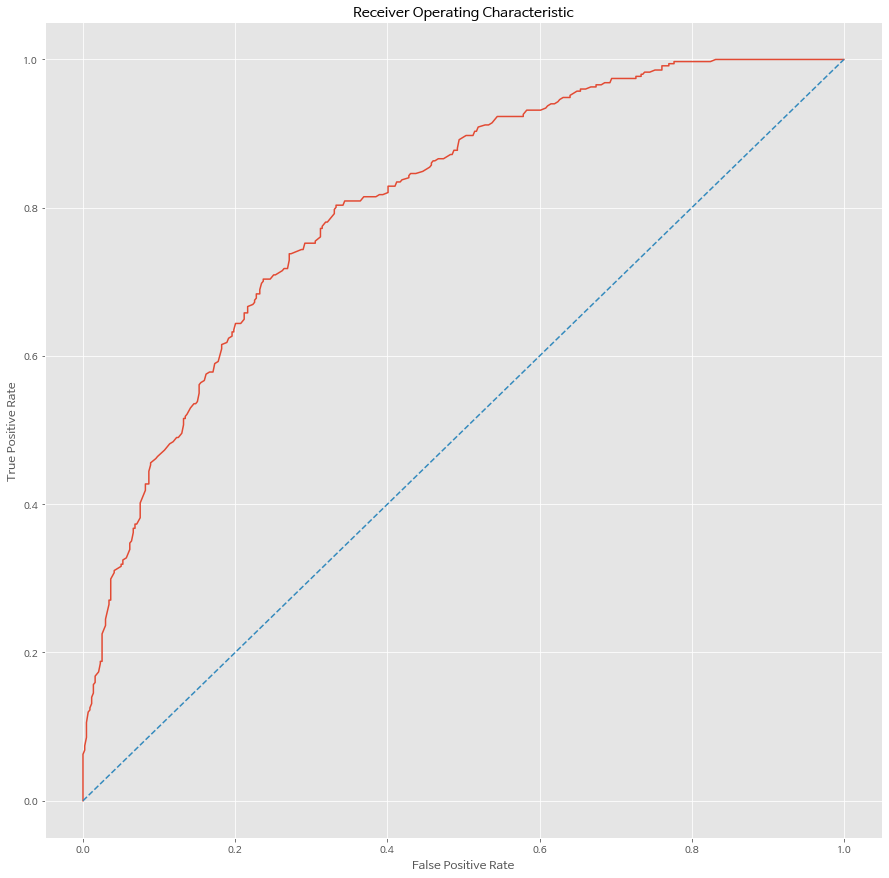

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### RandomForest 하이퍼 파라미터 조정 2

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    RandomForestClassifier(random_state=42, max_features='auto')
)

dists = {        
    'randomforestclassifier__n_estimators': [300 ,500,700], 
    'randomforestclassifier__max_depth': [50,100,150], 
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 500}
최적 스코어:  0.6950568890736448


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       439
           1       0.69      0.71      0.70       351

    accuracy                           0.73       790
   macro avg       0.73      0.73      0.73       790
weighted avg       0.73      0.73      0.73       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.7014084507042254


##### AUC Score, Roc Curve

AUC score:  0.8062872755355671


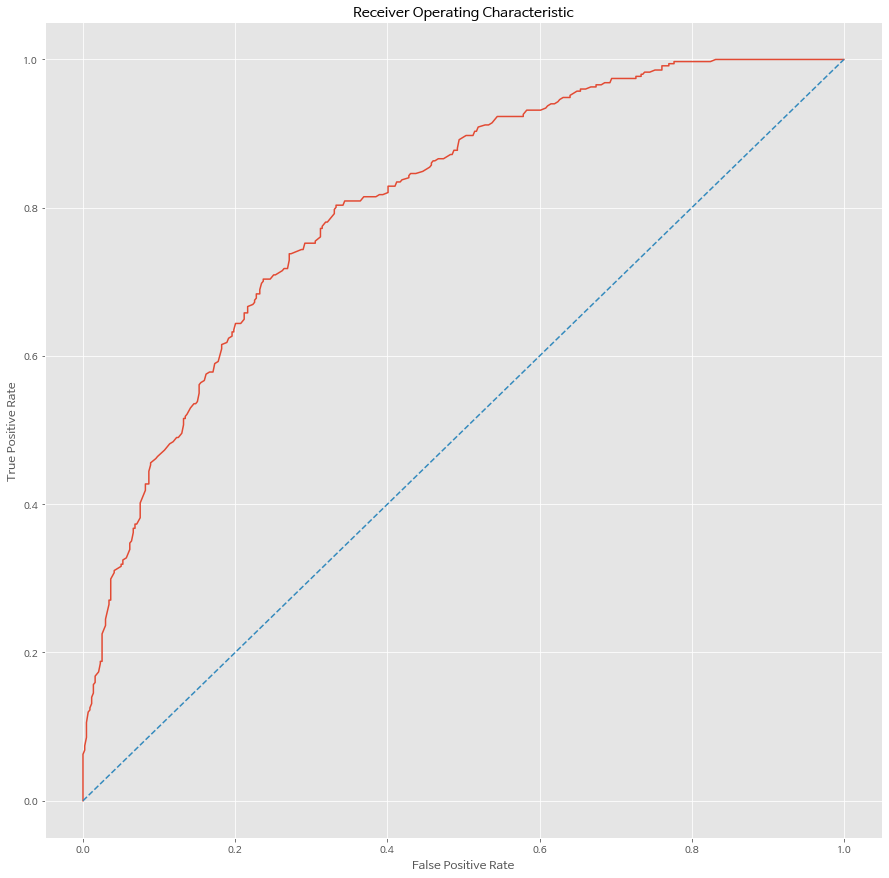

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### RandomForest 하이퍼 파라미터 조정 3

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    RandomForestClassifier(random_state=42, max_features='auto')
)

dists = {        
    'randomforestclassifier__n_estimators': [200, 500, 700], 
    'randomforestclassifier__max_depth': [35, 50, 65], 
    'randomforestclassifier__min_samples_leaf' : [1, 2]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 500}
최적 스코어:  0.6950568890736448


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       439
           1       0.69      0.71      0.70       351

    accuracy                           0.73       790
   macro avg       0.73      0.73      0.73       790
weighted avg       0.73      0.73      0.73       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.7014084507042254


##### AUC Score, Roc Curve

AUC score:  0.8062872755355671


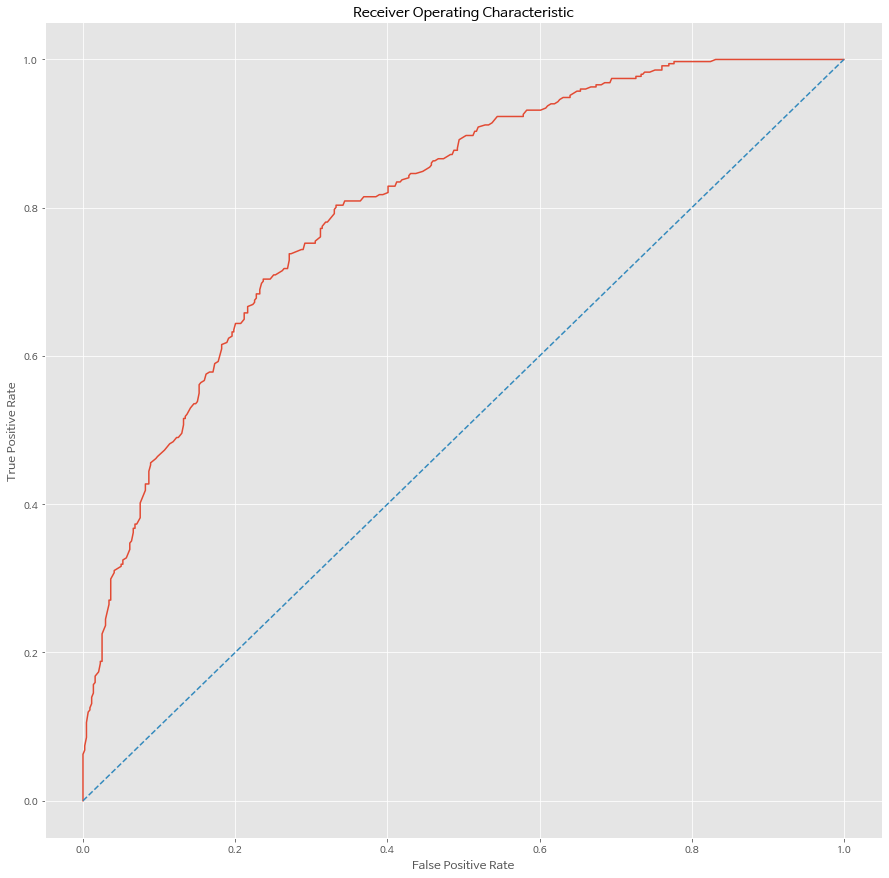

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### XGBoost 하이퍼 파라미터 조정 1




In [ ]:
from xgboost import XGBClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    XGBClassifier(random_state=42, n_jobs=-1)
)

dists = {        
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbclassifier__n_estimators': [100, 500, 1000], 
    'xgbclassifier__max_depth': [100, 500, 1000], 
    'xgbclassifier__eta' : [0, 0.5, 1]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
최적 하이퍼파라미터:  {'simpleimputer__strategy': 'mean', 'xgbclassifier__eta': 0, 'xgbclassifier__max_depth': 100, 'xgbclassifier__n_estimators': 100}
최적 스코어:  0.6937209364888258


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       439
           1       0.72      0.69      0.70       351

    accuracy                           0.74       790
   macro avg       0.74      0.74      0.74       790
weighted avg       0.74      0.74      0.74       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.7026239067055393


##### AUC Score, ROC Curve

AUC score:  0.8121150763519784


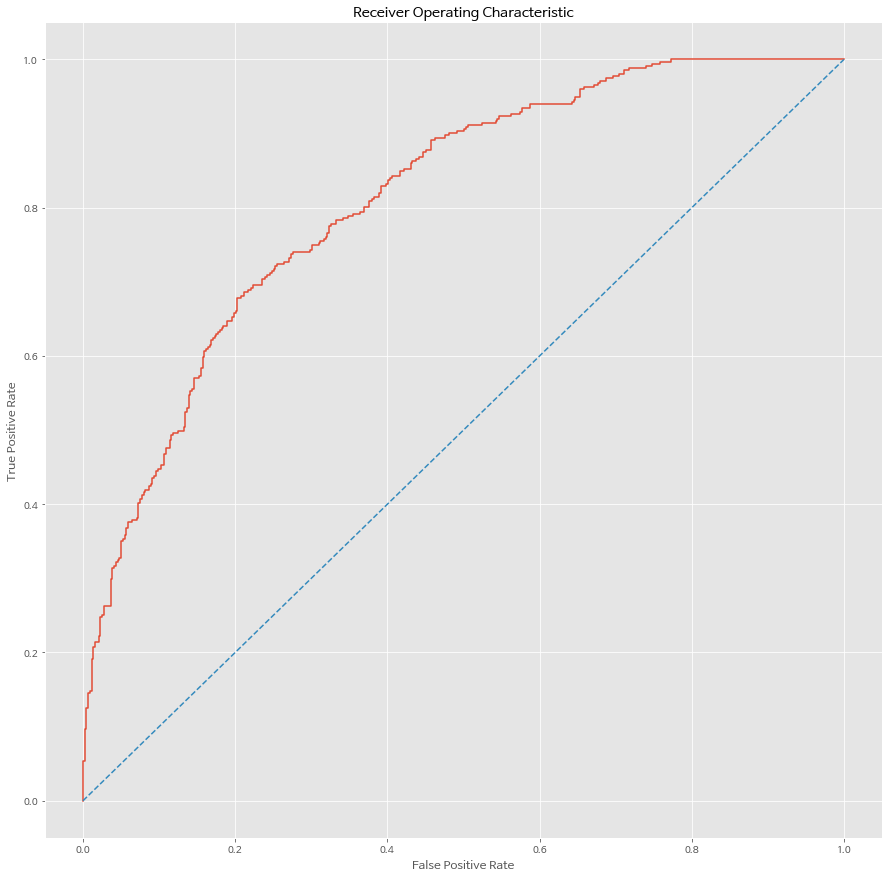

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### XGBoost 하이퍼 파라미터 조정 2

In [ ]:
from xgboost import XGBClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    XGBClassifier(random_state=42, n_jobs=-1, eta=0)
)

dists = {        
    'xgbclassifier__n_estimators': [50, 100, 150], 
    'xgbclassifier__max_depth': [50, 100, 150], 
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
최적 하이퍼파라미터:  {'xgbclassifier__max_depth': 50, 'xgbclassifier__n_estimators': 50}
최적 스코어:  0.6960327044165066


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       439
           1       0.71      0.69      0.70       351

    accuracy                           0.74       790
   macro avg       0.73      0.73      0.73       790
weighted avg       0.74      0.74      0.74       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.6985507246376812


##### AUC Score, ROC Curve

AUC score:  0.8056253204316985


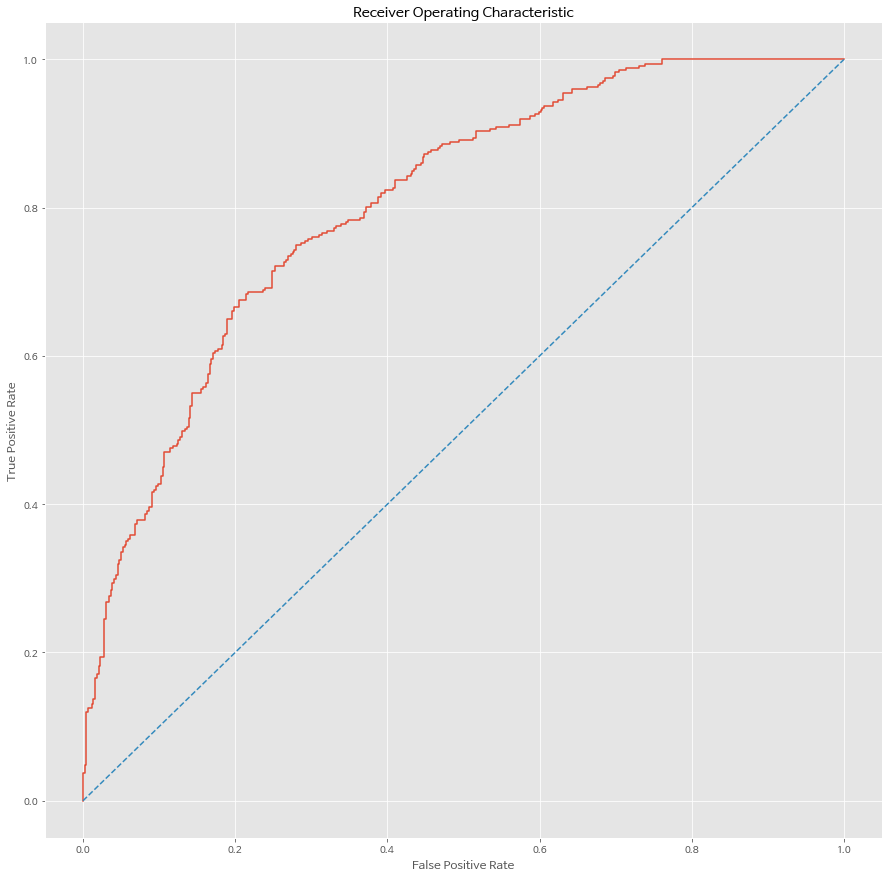

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### XGBoost 하이퍼 파라미터 조정 3

In [ ]:
from xgboost import XGBClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    XGBClassifier(random_state=42, n_jobs=-1, eta=0)
)

dists = {        
    'xgbclassifier__n_estimators': [20, 50, 80], 
    'xgbclassifier__max_depth': [20, 50, 80], 
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
최적 하이퍼파라미터:  {'xgbclassifier__max_depth': 20, 'xgbclassifier__n_estimators': 80}
최적 스코어:  0.6985300019064515


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       439
           1       0.70      0.67      0.69       351

    accuracy                           0.73       790
   macro avg       0.73      0.72      0.72       790
weighted avg       0.73      0.73      0.73       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.6880466472303207


##### AUC Score, ROC Curve

AUC score:  0.8127900109676874


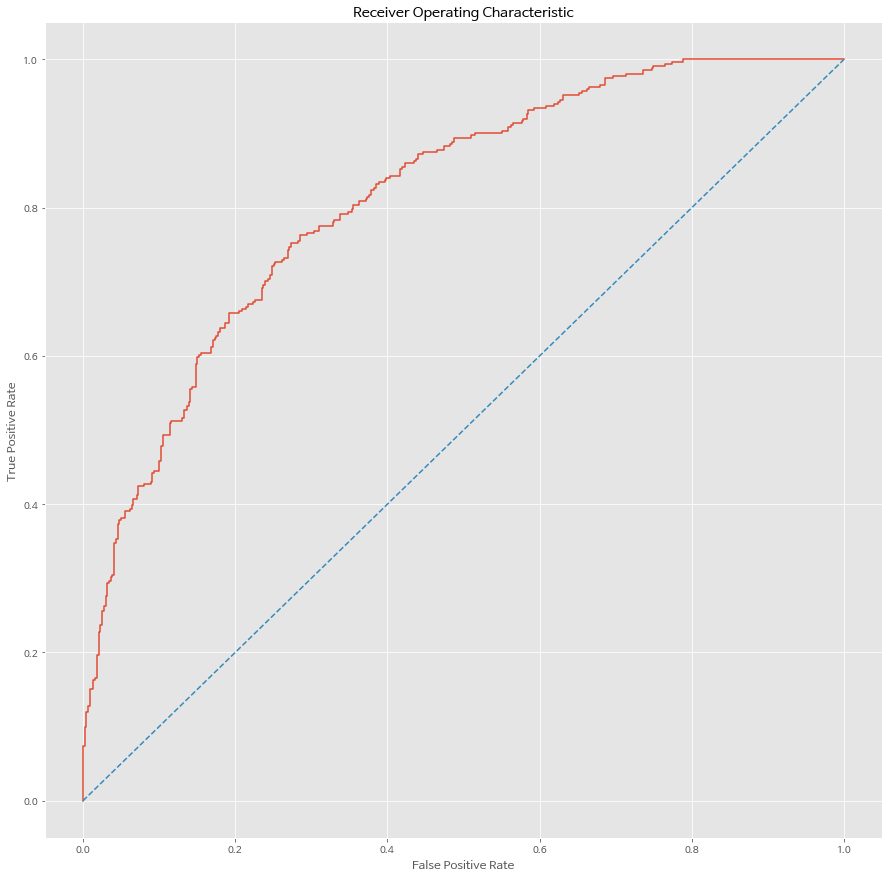

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### LightGBM 하이퍼파라미터 조정 1

In [ ]:
from lightgbm import LGBMClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    LGBMClassifier(random_state=42)
)

dists = {        
    'simpleimputer__strategy': ['mean', 'median'],
    'lgbmclassifier__n_estimators': [100, 500, 1000], 
    'lgbmclassifier__max_depth': [100, 500, 1000], 
    'lgbmclassifier__eta' : [0, 0.5, 1]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
최적 하이퍼파라미터:  {'lgbmclassifier__eta': 0, 'lgbmclassifier__max_depth': 100, 'lgbmclassifier__n_estimators': 100, 'simpleimputer__strategy': 'mean'}
최적 스코어:  0.6881019788877117


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       439
           1       0.70      0.71      0.71       351

    accuracy                           0.74       790
   macro avg       0.73      0.74      0.74       790
weighted avg       0.74      0.74      0.74       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.7072135785007072


##### AUC Score, ROC Curve

AUC score:  0.818552914224896


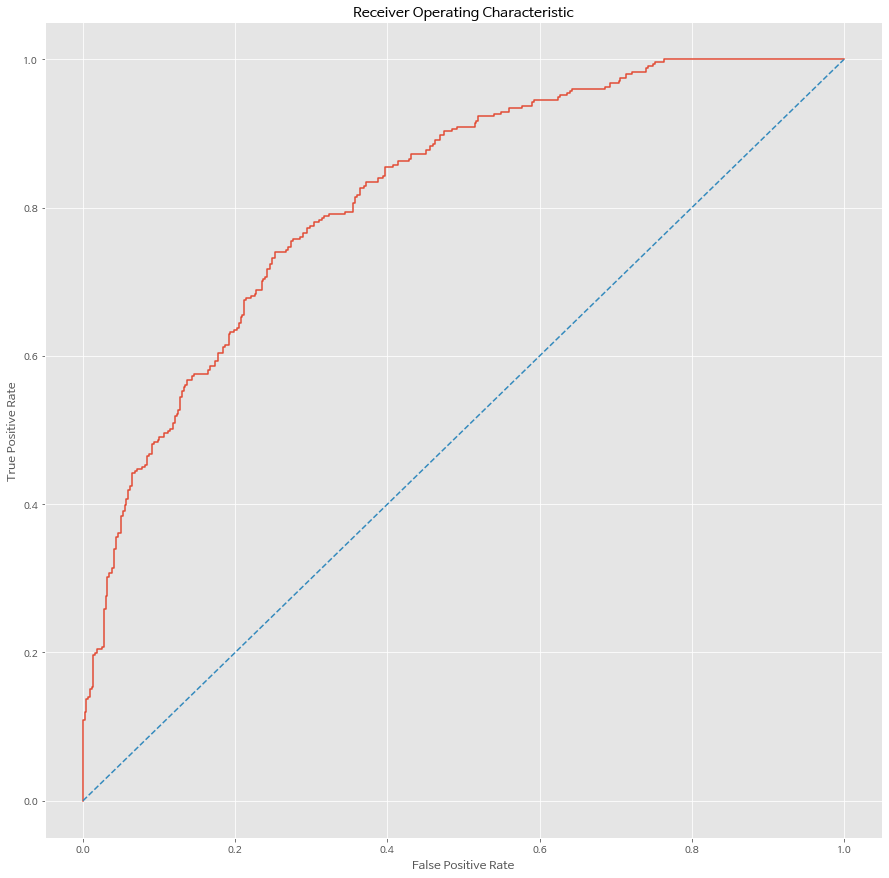

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### LightGBM 하이퍼파라미터 조정 2

In [ ]:
from lightgbm import LGBMClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = 'mean'), 
    LGBMClassifier(random_state=42, eta=0)
)

dists = {        
    'lgbmclassifier__n_estimators': [50, 100, 200], 
    'lgbmclassifier__max_depth': [50, 100, 150], 
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
최적 하이퍼파라미터:  {'lgbmclassifier__max_depth': 50, 'lgbmclassifier__n_estimators': 50}
최적 스코어:  0.7003051138118754


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       439
           1       0.72      0.70      0.71       351

    accuracy                           0.74       790
   macro avg       0.74      0.74      0.74       790
weighted avg       0.74      0.74      0.74       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.7080924855491328


##### AUC Score, ROC Curve

AUC score:  0.8196107444399017


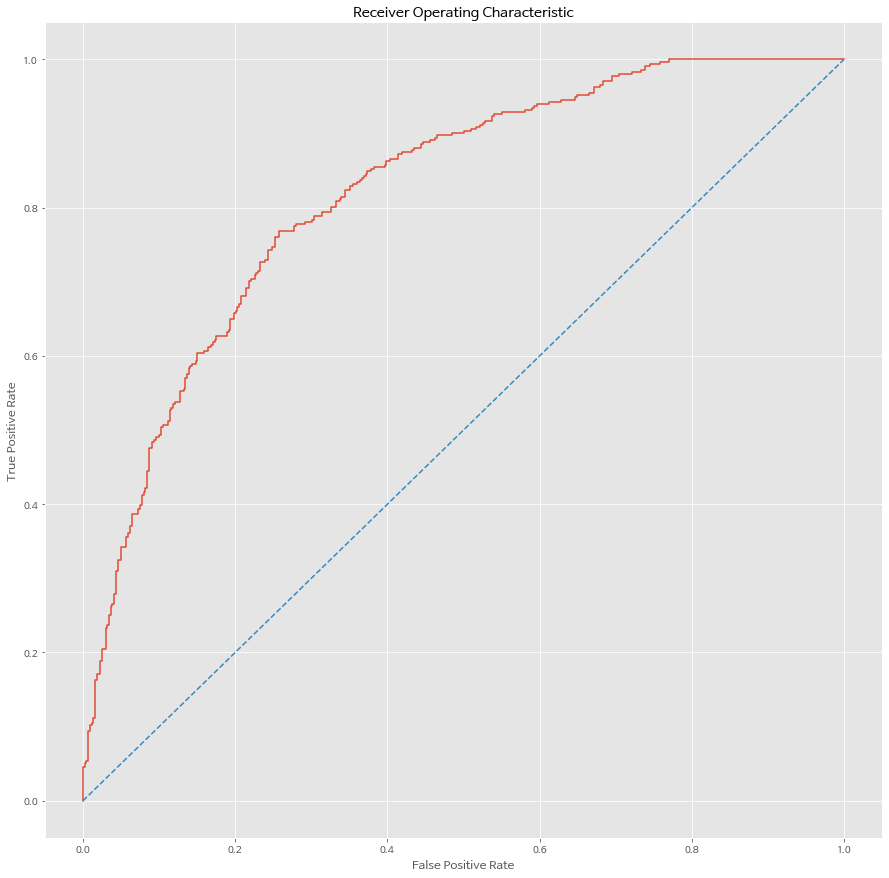

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### LightGBM 하이퍼파라미터 조정 3

In [ ]:
from lightgbm import LGBMClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = 'mean'), 
    LGBMClassifier(random_state=42, eta=0)
)

dists = {        
    'lgbmclassifier__n_estimators': [20, 50, 80], 
    'lgbmclassifier__max_depth': [20, 50, 80],
    'lgbmclassifier__min_child_samples': [5, 10, 20]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적 하이퍼파라미터:  {'lgbmclassifier__max_depth': 20, 'lgbmclassifier__min_child_samples': 10, 'lgbmclassifier__n_estimators': 50}
최적 스코어:  0.7029371249237778


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       439
           1       0.74      0.73      0.73       351

    accuracy                           0.76       790
   macro avg       0.76      0.76      0.76       790
weighted avg       0.76      0.76      0.76       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.7327586206896552


##### ACU Score, ROC Curve

AUC score:  0.8179947952157518


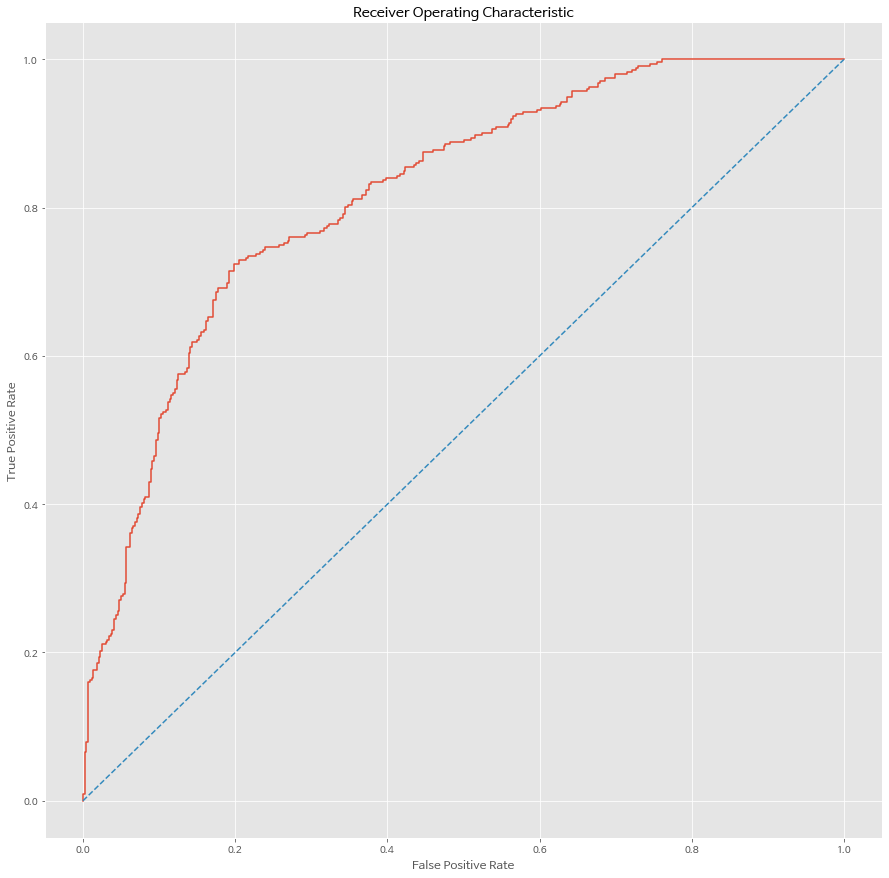

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### LightGBM 하이퍼파라미터 조정 4

In [ ]:
from lightgbm import LGBMClassifier 

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = 'mean'), 
    LGBMClassifier(random_state=42, eta=0)
)

dists = {        
    'lgbmclassifier__n_estimators': [45, 50, 55], 
    'lgbmclassifier__max_depth': [15, 20, 25],
    'lgbmclassifier__min_child_samples': [5, 10, 15]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=5, 
    scoring='f1',
    verbose=2,  
    n_jobs=-1
)

clf.fit(X_pitcter_train, y_pitcter_train)
print('최적 하이퍼파라미터: ', clf.best_params_)
print('최적 스코어: ', clf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적 하이퍼파라미터:  {'lgbmclassifier__max_depth': 15, 'lgbmclassifier__min_child_samples': 15, 'lgbmclassifier__n_estimators': 50}
최적 스코어:  0.7031611347113099


##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_pitcter_val)
print(classification_report(y_pitcter_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       439
           1       0.73      0.72      0.72       351

    accuracy                           0.75       790
   macro avg       0.75      0.75      0.75       790
weighted avg       0.75      0.75      0.75       790



##### F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_pred =clf.best_estimator_.predict(X_pitcter_val)
print("F1-Score :",f1_score(y_pitcter_val, y_pred))

F1-Score : 0.7202295552367289


##### AUC Score, ROC Curve

AUC score:  0.8260875208483408


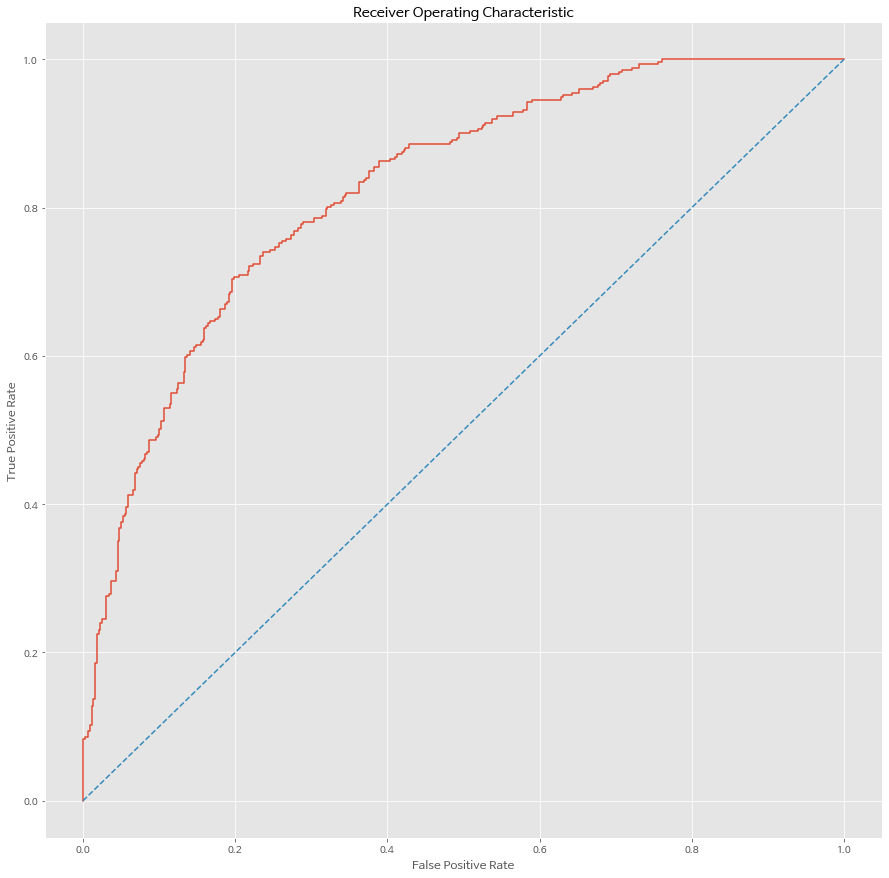

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.best_estimator_.predict_proba(X_pitcter_val)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_val, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_val, [0] * len(y_pitcter_val))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

#### 순열중요도

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(), SimpleImputer(strategy = 'mean'))),
    ('lgbm', LGBMClassifier(random_state=42, max_depth=20, eta=0, n_estimators=50, min_child_samples=10)) 
])
pipe.fit(X_pitcter_train, y_pitcter_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('targetencoder', TargetEncoder(cols=['팀'])),
                                 ('simpleimputer', SimpleImputer())])),
                ('lgbm',
                 LGBMClassifier(eta=0, max_depth=20, min_child_samples=10,
                                n_estimators=50, random_state=42))])

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['lgbm'], 
    scoring='roc_auc', 
    n_iter=5, 
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_train_val_transformed = pipe.named_steps['preprocessing'].transform(X_pitcter_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_train_val_transformed, y_pitcter_val);

In [ ]:
feature_names = X_pitcter_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

팀               0.157039
중앙펜스            0.054496
승               0.032836
패               0.029149
나이              0.028839
펜스높이            0.020818
ERA             0.008717
삼진              0.003894
볼넷              0.002710
선발              0.002166
타자              0.002070
WHIP            0.001970
FIP             0.001721
완투              0.001706
출장              0.001156
고4              0.000877
이닝              0.000783
WAR             0.000511
세               0.000488
보크              0.000462
폭투              0.000010
Golden_Glove    0.000000
평균이상투수          0.000000
규정이닝            0.000000
실점             -0.000038
완봉             -0.000130
사구             -0.000239
타자친화           -0.000434
홈런             -0.000544
자책             -0.000679
안타             -0.001800
홀드             -0.001830
dtype: float64

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['lgbm'], 
    scoring='f1', 
    n_iter=5, 
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_train_val_transformed = pipe.named_steps['preprocessing'].transform(X_pitcter_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_train_val_transformed, y_pitcter_val);

In [ ]:
feature_names = X_pitcter_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

팀               0.178952
중앙펜스            0.085666
승               0.069072
나이              0.053003
패               0.044902
ERA             0.042433
펜스높이            0.039782
삼진              0.024650
WAR             0.019341
출장              0.016099
안타              0.013962
FIP             0.013003
볼넷              0.012914
완투              0.011434
사구              0.011408
WHIP            0.011007
고4              0.010993
선발              0.009215
타자              0.006743
세               0.006013
실점              0.005852
홈런              0.004603
이닝              0.002134
자책              0.001729
폭투              0.001349
보크              0.001153
Golden_Glove    0.000000
타자친화            0.000000
평균이상투수          0.000000
규정이닝            0.000000
홀드             -0.000302
완봉             -0.001359
dtype: float64

#### 순열중요도 - 인 특성 제거 후 모델 학습

In [ ]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_pitcter_train.columns[mask]
X_pitcter_train_selected = X_pitcter_train[features]
X_pitcter_val_selected = X_pitcter_val[features]
X_pitcter_test_selected = X_pitcter_test[features]

In [ ]:
pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy = "mean"), 
    LGBMClassifier(random_state=42, max_depth=20, eta=0, n_estimators=50, min_child_samples=10)
)

pipe.fit(X_pitcter_train_selected, y_pitcter_train)

Pipeline(steps=[('targetencoder', TargetEncoder(cols=['팀'])),
                ('simpleimputer', SimpleImputer()),
                ('lgbmclassifier',
                 LGBMClassifier(eta=0, max_depth=20, min_child_samples=10,
                                n_estimators=50, random_state=42))])

##### Classification Report

In [ ]:
y_pred = pipe.predict(X_pitcter_test_selected)
print(classification_report(y_pitcter_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       563
           1       0.68      0.70      0.69       424

    accuracy                           0.73       987
   macro avg       0.73      0.73      0.73       987
weighted avg       0.73      0.73      0.73       987



##### F1-Score

In [ ]:
y_pred = pipe.predict(X_pitcter_test_selected)
print("F1-Score :", f1_score(y_pitcter_test, y_pred))

F1-Score : 0.6892523364485982


##### AUC Score, ROC Curve

AUC score:  0.8275704614765911


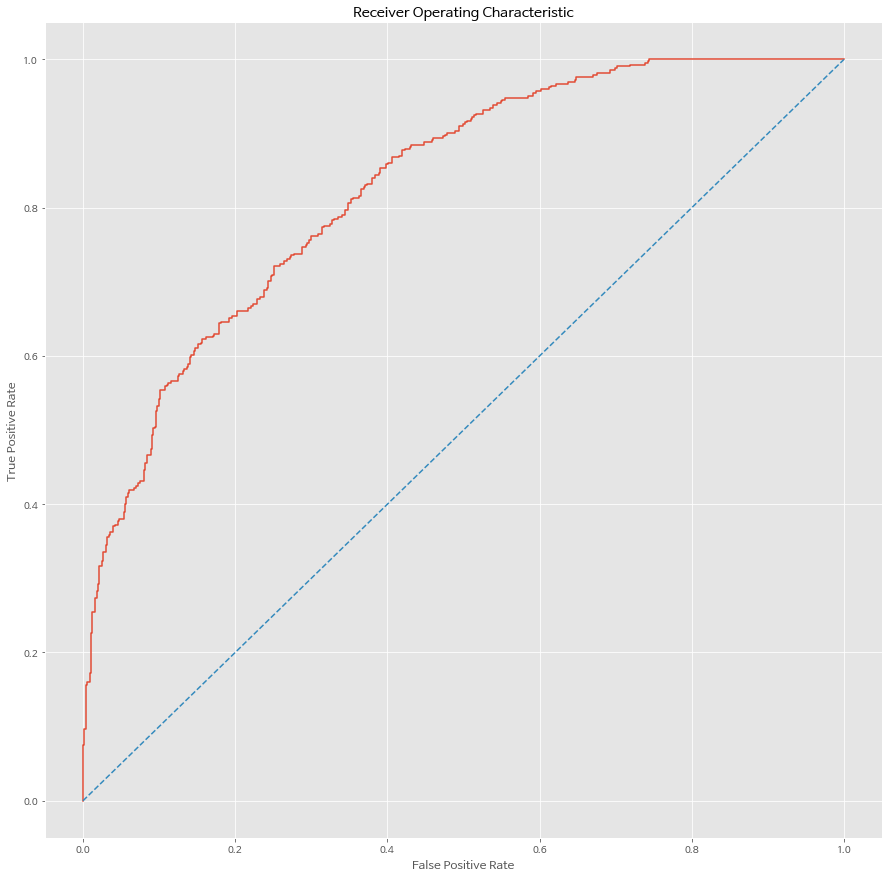

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = pipe.predict_proba(X_pitcter_test_selected)[:, -1]
print('AUC score: ', roc_auc_score(y_pitcter_test, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_pitcter_test, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_pitcter_test, [0] * len(y_pitcter_test))
plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.show()

In [ ]:
boosting = LGBMClassifier(random_state=42, max_depth=20, eta=0, n_estimators=50, min_child_samples=10)

In [ ]:
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_pitcter_train_selected)
X_val_encoded = encoder.transform(X_pitcter_val_selected)
X_test_encoded = encoder.transform(X_pitcter_test_selected)

eval_set = [(X_train_encoded, y_pitcter_train),
            (X_val_encoded, y_pitcter_val)]

boosting.fit(X_train_encoded, y_pitcter_train,
             eval_set=eval_set,
             early_stopping_rounds=100
             )

[1]	training's binary_logloss: 0.653638	valid_1's binary_logloss: 0.661103
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_logloss: 0.625657	valid_1's binary_logloss: 0.639956
[3]	training's binary_logloss: 0.603093	valid_1's binary_logloss: 0.62351
[4]	training's binary_logloss: 0.582707	valid_1's binary_logloss: 0.609115
[5]	training's binary_logloss: 0.566062	valid_1's binary_logloss: 0.596803
[6]	training's binary_logloss: 0.549003	valid_1's binary_logloss: 0.585301
[7]	training's binary_logloss: 0.536004	valid_1's binary_logloss: 0.577421
[8]	training's binary_logloss: 0.523262	valid_1's binary_logloss: 0.570142
[9]	training's binary_logloss: 0.510255	valid_1's binary_logloss: 0.563916
[10]	training's binary_logloss: 0.500117	valid_1's binary_logloss: 0.557883
[11]	training's binary_logloss: 0.4898	valid_1's binary_logloss: 0.552787
[12]	training's binary_logloss: 0.481202	valid_1's binary_logloss: 0.547853
[13]	training's binary_logloss: 0.473

LGBMClassifier(eta=0, max_depth=20, min_child_samples=10, n_estimators=50,
               random_state=42)

In [ ]:
import shap
explainer = shap.TreeExplainer(boosting)

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test_encoded)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


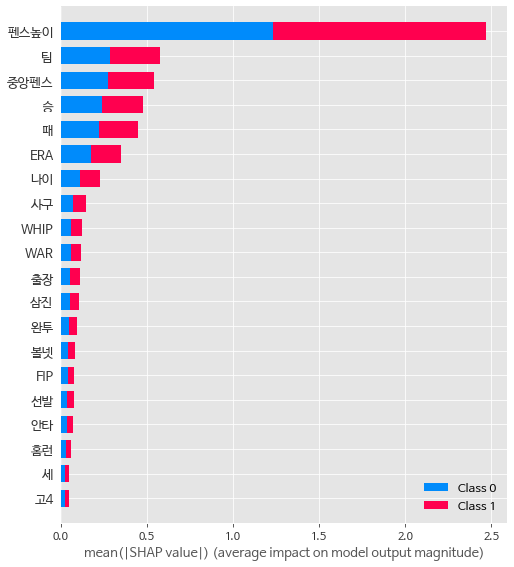

In [ ]:
# summary plot
shap.summary_plot(shap_values, X_test_encoded)